In [2]:
import sys
import pathlib
module_path = str(pathlib.Path().absolute()).replace('/notebooks', '')
sys.path.append(module_path)

from scripts.jobs.process_raster_layer import ProcessRasterLayer

root_dem_location = '/mnt/share/mnt/RESEARCH/SATELLITE/DEM/'
root_nuts_location = '/mnt/share/mnt/RESEARCH/SATELLITE/NUTS/'

raster_processor = ProcessRasterLayer(root_dem_location, root_nuts_location)


In [ ]:

raster_processor.CreateVRT()
raster_processor.CreateTIFFromVRT()

In [8]:
raster_processor.CreateBorderRaster()

[[ 2.0000000e+00  2.0000000e+00  2.0000000e+00 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [ 2.0000000e+00  2.0000000e+00  2.0000000e+00 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [ 2.0000000e+00  2.0000000e+00  2.0000000e+00 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 ...
 [ 2.0000000e+00  2.0000000e+00  2.0000000e+00 ...  2.0000000e+00
   2.0000000e+00  2.0000000e+00]
 [ 2.0000000e+00  2.0000000e+00  2.0000000e+00 ...  2.0000000e+00
   2.0000000e+00  2.0000000e+00]
 [ 2.0000000e+00  2.0000000e+00  2.0000000e+00 ...  2.0000000e+00
   2.0000000e+00  2.0000000e+00]]


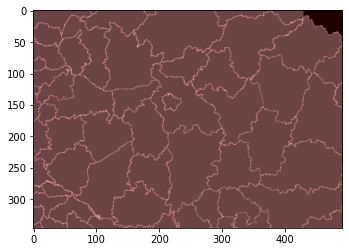

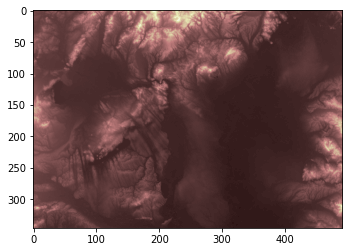

In [11]:

bb_coordinates = raster_processor.GetTargetBoundingBox()

w = raster_processor.ReadWindowFromCoordinates(root_dem_location + 'rasterized.tif', bb_coordinates)
print(w)
w[w < 0] = 0
raster_processor.plotArray(w)

w = raster_processor.ReadWindowFromCoordinates(root_dem_location + 'test.tif', bb_coordinates)
raster_processor.plotArray(w)


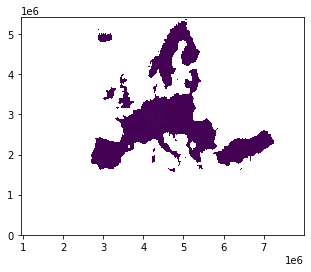

PROJCS["ETRS89_ETRS_LAEA",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.2572221010042,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]
2
7056
5416
BoundingBox(left=943750.0, bottom=0.0, right=7999750.0, top=5416000.0)


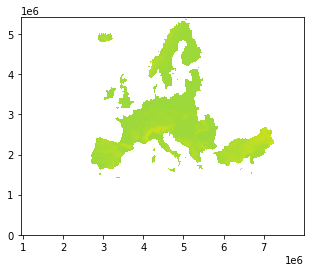

PROJCS["ETRS89_ETRS_LAEA",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
2
7056
5416
BoundingBox(left=943750.0, bottom=0.0, right=7999750.0, top=5416000.0)


In [8]:
raster_processor.PrintRasterFileStatistics(raster_processor.root_dem_location + 'rasterized.tif')
raster_processor.PrintRasterFileStatistics(raster_processor.root_dem_location + 'test.vrt')